abdirahman abdiweli 

This script analyzes modulation signals, filtering and visualizing normalized data, clustering with K-Means, 
and training an LSTM model for classification. It emphasizes visualization and evaluates the LSTM models 
accuracy. Adjust hyperparameters as needed.

In [37]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

# Specify the absolute path of the pickle file
file_path = r'C:\Users\caqiid\Downloads\RML2016.10a_dict.pkl'

# Load the data from the pickle file
with open(file_path, 'rb') as f:
    data = pickle.load(f, encoding='latin1')

# Extract necessary data from the loaded data
modulation = [key[0] for key in data.keys()]
snr = [key[1] for key in data.keys()]
arrays = list(data.values())

# Create a DataFrame with the necessary columns
df = pd.DataFrame({'Modulation': modulation, 'SNR': snr, 'arrays': arrays})

# Filter the DataFrame for specific modulations and SNR 18
selected_modulations = ['QPSK', 'WBFM', 'AM-DSB', 'GFSK']
selected_data = df[(df['SNR'] == 18) & (df['Modulation'].isin(selected_modulations))]

# Display the modified DataFrame
print(selected_data.head())

    Modulation  SNR                                             arrays
54        GFSK   18  [[[-0.008091285, -0.008177276, -0.008236672, -...
105       WBFM   18  [[[0.0008660598, 0.0008730611, 0.0009513974, 0...
163     AM-DSB   18  [[[0.00086655794, 0.0008483075, 0.0008909479, ...
199       QPSK   18  [[[-0.00029786173, -0.00082597416, -0.00147864...


In [3]:
# Specify the list of modulations to display
selected_modulations = ['WBFM','AM-DSB']

# Assuming each entry in 'arrays' is a 3D array with shape (num_samples, num_channels, num_features)
num_samples_to_display = 1000
num_channels_to_display = 2  # Display only 2 channels

# Iterate through selected modulations
for modulation in selected_modulations:
    # Filter the DataFrame for the specific modulation and SNR 18
    selected_data_mod = df[(df['SNR'] == 18) & (df['Modulation'] == modulation)]

    # Display information for the current modulation
    print(f"Modulation: {modulation}")

    # Iterate through selected_data_mod and display the first 1000 samples and 2 channels
    for index, row in selected_data_mod.iterrows():
        snr = row['SNR']
        data_array = row['arrays']

Modulation: WBFM
Modulation: AM-DSB


Modulation: WBFM
Normalized array dimensions: 1000 samples x 2 channels


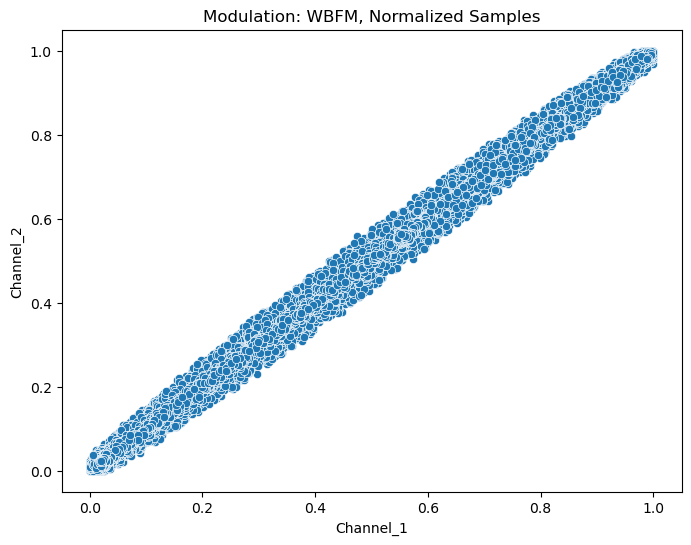



Modulation: AM-DSB
Normalized array dimensions: 1000 samples x 2 channels


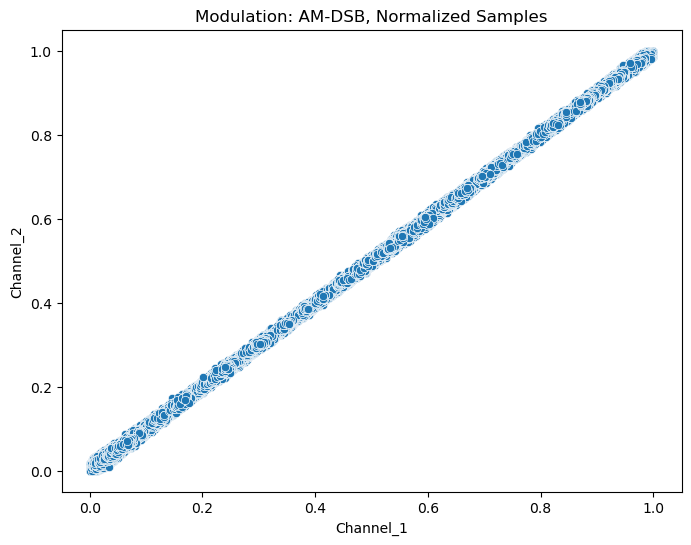

In [4]:
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Specify the list of modulations to display
selected_modulations = ['WBFM','AM-DSB']

# Assuming each entry in 'arrays' is a 3D array with shape (num_samples, num_channels, num_features)
num_samples_to_display = 1000
num_channels_to_display = 2  # Display only 2 channels

# Iterate through selected modulations
for modulation in selected_modulations:
    # Filter the DataFrame for the specific modulation and SNR 18
    selected_data_mod = df[(df['SNR'] == 18) & (df['Modulation'] == modulation)]

    # Display information for the current modulation
    print(f"Modulation: {modulation}")

    # Combine all samples into a single array for the selected modulation
    combined_array = np.concatenate([row['arrays'][:num_samples_to_display, :num_channels_to_display, :] for _, row in selected_data_mod.iterrows()], axis=0)

    # Extract the number of features from the shape of combined_array
    num_features = combined_array.shape[2]

    # Normalize the combined array
    scaler = MinMaxScaler()
    normalized_array = scaler.fit_transform(combined_array.reshape(-1, num_channels_to_display * num_features))

    # Reshape the normalized array back to 3D
    normalized_array = normalized_array.reshape(-1, num_channels_to_display, num_features)

    # Display the dimensions of the normalized array
    num_samples_normalized, num_channels_normalized, _ = normalized_array.shape
    print(f"Normalized array dimensions: {num_samples_normalized} samples x {num_channels_normalized} channels")

    # Visualize the normalized array using Seaborn scatter plot
    reshaped_normalized_data = normalized_array.reshape(-1, num_channels_normalized)
    df_normalized_scatter = pd.DataFrame(reshaped_normalized_data, columns=[f'Channel_{i+1}' for i in range(num_channels_normalized)])

    # Create a scatter plot using Seaborn for the normalized data
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Channel_1', y='Channel_2', data=df_normalized_scatter)
    plt.title(f"Modulation: {modulation}, Normalized Samples")
    plt.show()

    print("\n" + "=" * 50 + "\n")  # Add a separator for better readability


Normalized array dimensions: 1000 samples x 2 channels


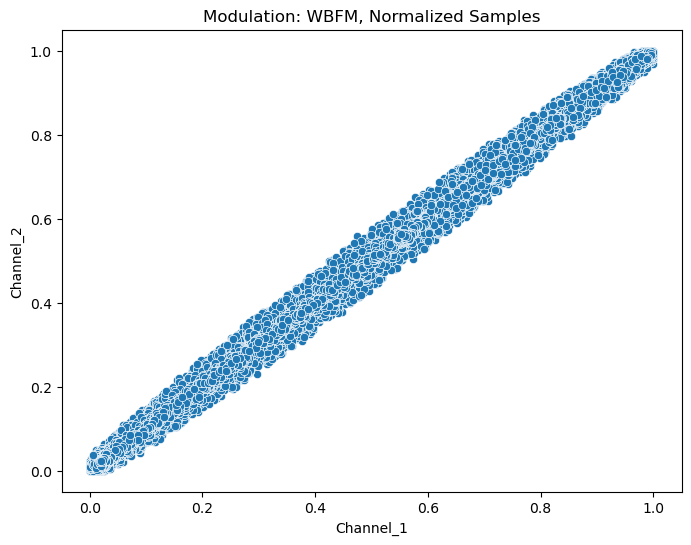



Normalized array dimensions: 1000 samples x 2 channels


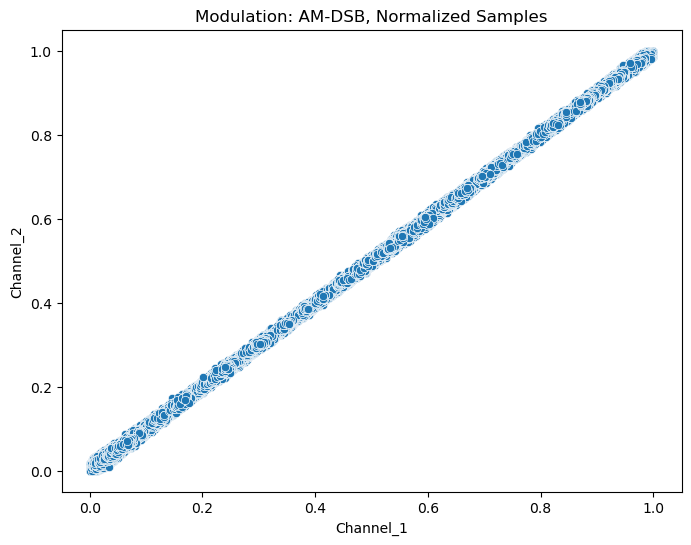



Combined normalized array dimensions: 2000 samples x 2 channels


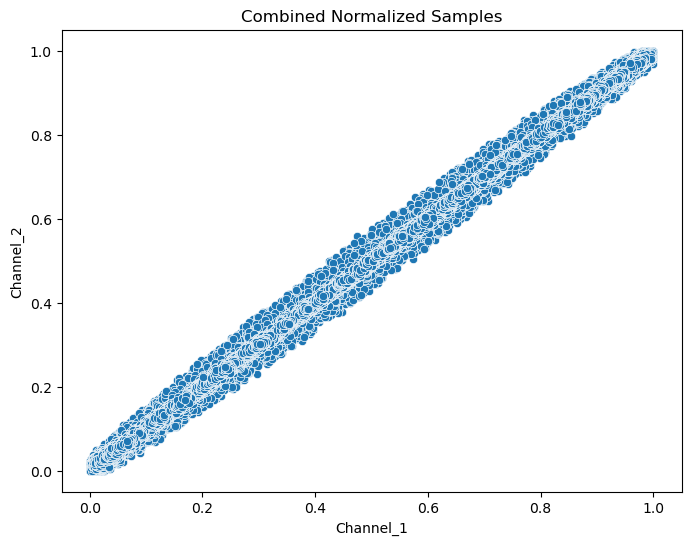

In [5]:
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Specify the list of modulations to display
selected_modulations = ['WBFM','AM-DSB']

# Assuming each entry in 'arrays' is a 3D array with shape (num_samples, num_channels, num_features)
num_samples_to_display = 1000
num_channels_to_display = 2  # Display only 2 channels

# Initialize a list to store normalized arrays for each modulation
normalized_arrays = []

# Iterate through selected modulations
for modulation in selected_modulations:
    # Filter the DataFrame for the specific modulation and SNR 18
    selected_data_mod = df[(df['SNR'] == 18) & (df['Modulation'] == modulation)]

    # Combine all samples into a single array for the selected modulation
    combined_array = np.concatenate([row['arrays'][:num_samples_to_display, :num_channels_to_display, :] for _, row in selected_data_mod.iterrows()], axis=0)

    # Normalize the combined array
    scaler = MinMaxScaler()
    normalized_array = scaler.fit_transform(combined_array.reshape(-1, num_channels_to_display * num_features))

    # Reshape the normalized array back to 3D
    normalized_array = normalized_array.reshape(-1, num_channels_to_display, num_features)

    # Append the normalized array to the list
    normalized_arrays.append(normalized_array)

    # Display the dimensions of the normalized array
    num_samples_normalized, num_channels_normalized, _ = normalized_array.shape
    print(f"Normalized array dimensions: {num_samples_normalized} samples x {num_channels_normalized} channels")

    # Visualize the normalized array using Seaborn scatter plot
    reshaped_normalized_data = normalized_array.reshape(-1, num_channels_normalized)
    df_normalized_scatter = pd.DataFrame(reshaped_normalized_data, columns=[f'Channel_{i+1}' for i in range(num_channels_normalized)])

    # Create a scatter plot using Seaborn for the normalized data
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Channel_1', y='Channel_2', data=df_normalized_scatter)
    plt.title(f"Modulation: {modulation}, Normalized Samples")
    plt.show()

    print("\n" + "=" * 50 + "\n")  # Add a separator for better readability

# Combine all normalized arrays into a single array
all_normalized_arrays = np.concatenate(normalized_arrays, axis=0)

# Display the dimensions of the combined normalized array
num_samples_combined, num_channels_combined, _ = all_normalized_arrays.shape
print(f"Combined normalized array dimensions: {num_samples_combined} samples x {num_channels_combined} channels")

# Visualize the combined normalized array using Seaborn scatter plot
reshaped_combined_normalized_data = all_normalized_arrays.reshape(-1, num_channels_combined)
df_combined_normalized_scatter = pd.DataFrame(reshaped_combined_normalized_data, columns=[f'Channel_{i+1}' for i in range(num_channels_combined)])

# Create a scatter plot using Seaborn for the combined normalized data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Channel_1', y='Channel_2', data=df_combined_normalized_scatter)
plt.title("Combined Normalized Samples")
plt.show()

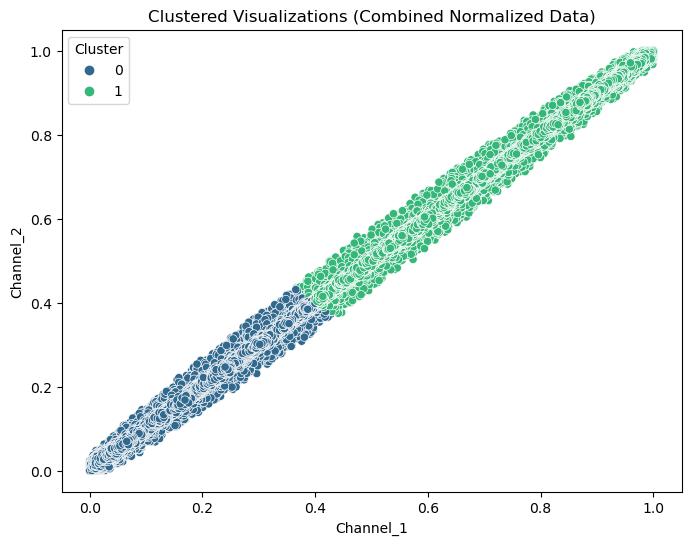

In [6]:
from sklearn.cluster import KMeans

# Cluster the combined normalized arrays using KMeans
num_clusters = 2  # You can adjust the number of clusters based on your requirement
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(reshaped_combined_normalized_data)

# Add the cluster labels to the DataFrame
df_combined_normalized_scatter['Cluster'] = clusters

# Visualize the clustered data after normalization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Channel_1', y='Channel_2', hue='Cluster', data=df_combined_normalized_scatter, palette='viridis', legend='full')
plt.title("Clustered Visualizations (Combined Normalized Data)")
plt.show()

In [59]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for the clustered data
silhouette_avg = silhouette_score(reshaped_combined_normalized_data, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.7164508700370789


In [7]:
print("Shape of reshaped_combined_normalized_data:", reshaped_combined_normalized_data.shape)


Shape of reshaped_combined_normalized_data: (256000, 2)


In [8]:
from sklearn.model_selection import train_test_split

# Sample a subset of the data
sample_size = 60000 # You can adjust the sample size based on your needs
sampled_data = reshaped_combined_normalized_data[:sample_size, :]

# Reshape the sampled data for LSTM
X_sampled = sampled_data.reshape(sampled_data.shape[0], 1, sampled_data.shape[1])

# Assuming you have labels for clustering (clusters), take the corresponding labels for the sample
y_sampled = clusters[:sample_size]

# Split the sampled data into training and testing sets
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(
    X_sampled, y_sampled, test_size=0.3, random_state=42
)

In [9]:
# Print the shapes of the resulting arrays
print("X_train_sampled shape:", X_train_sampled.shape)
print("X_test_sampled shape:", X_test_sampled.shape)
print("y_train_sampled shape:", y_train_sampled.shape)
print("y_test_sampled shape:", y_test_sampled.shape)

X_train_sampled shape: (42000, 1, 2)
X_test_sampled shape: (18000, 1, 2)
y_train_sampled shape: (42000,)
y_test_sampled shape: (18000,)


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
# Define and compile the LSTM model with increased regularization
model = Sequential()
model.add(LSTM(units=25, input_shape=(1, 2)))  # Decrease the number of units
model.add(Dropout(0.6))  # Adjust the dropout rate
model.add(Dense(units=num_clusters, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))
model.compile(optimizer=SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Fit the model with early stopping callback
history = model.fit(X_train_sampled, y_train_sampled, epochs=30, batch_size=32, validation_split=0.3, callbacks=[early_stopping])

Epoch 1/30
919/919 [==============================] - 7s 4ms/step - loss: 0.6725 - accuracy: 0.7192 - val_loss: 0.6279 - val_accuracy: 0.8322
Epoch 2/30
919/919 [==============================] - 3s 3ms/step - loss: 0.5834 - accuracy: 0.8677 - val_loss: 0.5288 - val_accuracy: 0.9717
Epoch 3/30
919/919 [==============================] - 3s 3ms/step - loss: 0.4834 - accuracy: 0.9257 - val_loss: 0.4223 - val_accuracy: 0.9937
Epoch 4/30
919/919 [==============================] - 4s 4ms/step - loss: 0.3965 - accuracy: 0.9506 - val_loss: 0.3401 - val_accuracy: 0.9991
Epoch 5/30
919/919 [==============================] - 3s 4ms/step - loss: 0.3354 - accuracy: 0.9624 - val_loss: 0.2877 - val_accuracy: 0.9953
Epoch 6/30
919/919 [==============================] - 3s 3ms/step - loss: 0.2957 - accuracy: 0.9709 - val_loss: 0.2549 - val_accuracy: 0.9945
Epoch 7/30
919/919 [==============================] - 3s 3ms/step - loss: 0.2690 - accuracy: 0.9766 - val_loss: 0.2324 - val_accuracy: 0.9947
Epoch 

In [35]:
# Print the accuracy from the training history
accuracy = history.history['accuracy']  # Use 'acc' instead of 'accuracy' for older versions of Keras
print(f'Training Accuracy: {accuracy[-1]}')

# If you also want to print validation accuracy
val_accuracy = history.history['val_accuracy']  # Use 'val_acc' instead of 'val_accuracy' for older versions of Keras
print(f'Validation Accuracy: {val_accuracy[-1]}')

Training Accuracy: 0.9921085834503174
Validation Accuracy: 0.9954765439033508


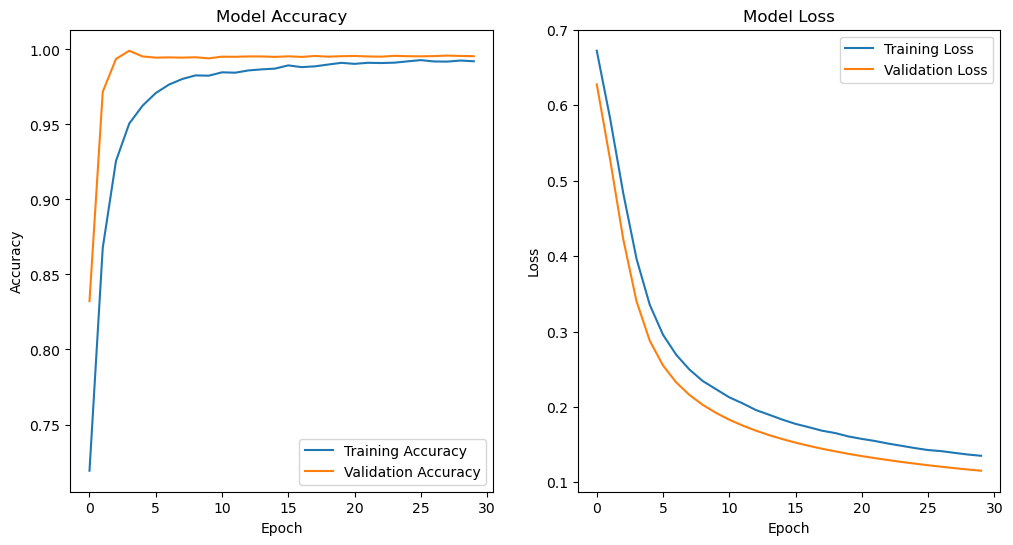

In [36]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [33]:
# Assuming X_test_sampled and y_test_sampled are your test data
test_loss, test_accuracy = model.evaluate(X_test_sampled, y_test_sampled)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

563/563 [==============================] - 1s 2ms/step - loss: 0.1139 - accuracy: 0.9957
Test Loss: 0.11394458264112473, Test Accuracy: 0.9956666827201843
